### EDA - Ankara, Turkey Chapter - Predicting Student Success Using Machine Learning
### Project Overview
> In this project, the Omdena Ankara, Turkey Chapter team will be utilizes data analysis and machine learning methods to enhance student success in the education system and promote data-driven education policies. The findings obtained will be utilized by education administrators, teachers, and policymakers to identify more effective strategies for enhancing students’ academic achievements.

### Dataset Overview
Two datasets were conbined and used, which contained 1044 instances and 33 columns. The datasets can be downloaded [here](https://archive.ics.uci.edu/dataset/320/student+performance) 

In [1]:
# import needed labraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# sb.set(style='darkgrid')
import plotly.express as px

%matplotlib inline

import warnings
warnings.simplefilter("ignore")

In [2]:
# Read the dataset into a DataFrame
df_student = pd.read_csv("Final-data.csv")


In [3]:
# View the first 5 records
df_student.head()

,Unnamed: 0,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Subject
0,0,GP,F,18,U,GT3,A,4,4,at_home,...,3,4,1,1,3,6,5,6,6,1
1,1,GP,F,17,U,GT3,T,1,1,at_home,...,3,3,1,1,3,4,5,5,6,1
2,2,GP,F,15,U,LE3,T,1,1,at_home,...,3,2,2,3,3,10,7,8,10,1
3,3,GP,F,15,U,GT3,T,4,2,health,...,2,2,1,1,5,2,15,14,15,1
4,4,GP,F,16,U,GT3,T,3,3,other,...,3,2,1,2,5,4,6,10,10,1


In [4]:
# Check the number of rows and columns in the ddtaset
df_student.shape

(1044, 35)

In [5]:
# Check for NULL values in all the columns
df_student.isnull().sum()

Unnamed: 0    0
school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
Subject       0
dtype: int64

In [6]:
# Check for available columns 
for i, v in enumerate(df_student):
    print(i,v)


0 Unnamed: 0
1 school
2 sex
3 age
4 address
5 famsize
6 Pstatus
7 Medu
8 Fedu
9 Mjob
10 Fjob
11 reason
12 guardian
13 traveltime
14 studytime
15 failures
16 schoolsup
17 famsup
18 paid
19 activities
20 nursery
21 higher
22 internet
23 romantic
24 famrel
25 freetime
26 goout
27 Dalc
28 Walc
29 health
30 absences
31 G1
32 G2
33 G3
34 Subject


In [7]:
# Drop the `Unnamed:` column, since it is the same thing as the index
df_student.drop(['Unnamed: 0'], axis=1, inplace=True )

In [8]:
df_student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      1044 non-null   object
 1   sex         1044 non-null   object
 2   age         1044 non-null   int64 
 3   address     1044 non-null   object
 4   famsize     1044 non-null   object
 5   Pstatus     1044 non-null   object
 6   Medu        1044 non-null   int64 
 7   Fedu        1044 non-null   int64 
 8   Mjob        1044 non-null   object
 9   Fjob        1044 non-null   object
 10  reason      1044 non-null   object
 11  guardian    1044 non-null   object
 12  traveltime  1044 non-null   int64 
 13  studytime   1044 non-null   int64 
 14  failures    1044 non-null   int64 
 15  schoolsup   1044 non-null   object
 16  famsup      1044 non-null   object
 17  paid        1044 non-null   object
 18  activities  1044 non-null   object
 19  nursery     1044 non-null   object
 20  higher  

In [9]:
# Check the statiscal distribution of the data
df_student.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Subject
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,16.726054,2.603448,2.387931,1.522989,1.970307,0.264368,3.935824,3.201149,3.156130,1.494253,2.284483,3.543103,4.434866,11.213602,11.246169,11.341954,0.378352
std,1.239975,1.124907,1.099938,0.731727,0.834353,0.656142,0.933401,1.031507,1.152575,0.911714,1.285105,1.424703,6.210017,2.983394,3.285071,3.864796,0.485209
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,9.000000,9.000000,10.000000,0.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,11.000000,0.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000,1.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000,1.000000


In [10]:
# Add a total_score column
df_student["average_score"] = df_student[['G1', 'G2', 'G3']].mean(axis=1).round()
df_student

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,goout,Dalc,Walc,health,absences,G1,G2,G3,Subject,average_score
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,1,1,3,6,5,6,6,1,6.0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,1,1,3,4,5,5,6,1,5.0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,2,2,3,3,10,7,8,10,1,8.0
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,1,1,5,2,15,14,15,1,15.0
4,GP,F,16,U,GT3,T,3,3,other,other,...,2,1,2,5,4,6,10,10,1,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,MS,F,19,R,GT3,T,2,3,services,other,...,2,1,2,5,4,10,11,10,0,10.0
1040,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,1,1,1,4,15,15,16,0,15.0
1041,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,5,6,11,12,9,0,11.0
1042,MS,M,17,U,LE3,T,3,1,services,services,...,5,3,4,2,6,10,10,10,0,10.0


## Data Visualisation 

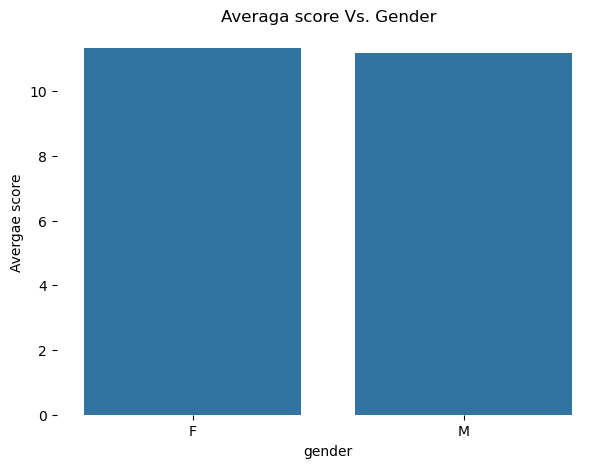

In [11]:
# Which of the gender performs better
plt.figure(figsize=(7,5)) 
base_color=sns.color_palette()[0]
df_student = df_student.sort_values(by='average_score', ascending=False)
sns.barplot(x=df_student['sex'],y=df_student['average_score'], color=base_color, ci=None).set(title='Math performance gender wise')
for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.title("Averaga score Vs. Gender")
plt.xlabel('gender')
plt.ylabel('Avergae score');

#### The Female studnets performed better than their Male counterparts.

In [12]:
df_student.Pstatus.value_counts()

T    923
A    121
Name: Pstatus, dtype: int64

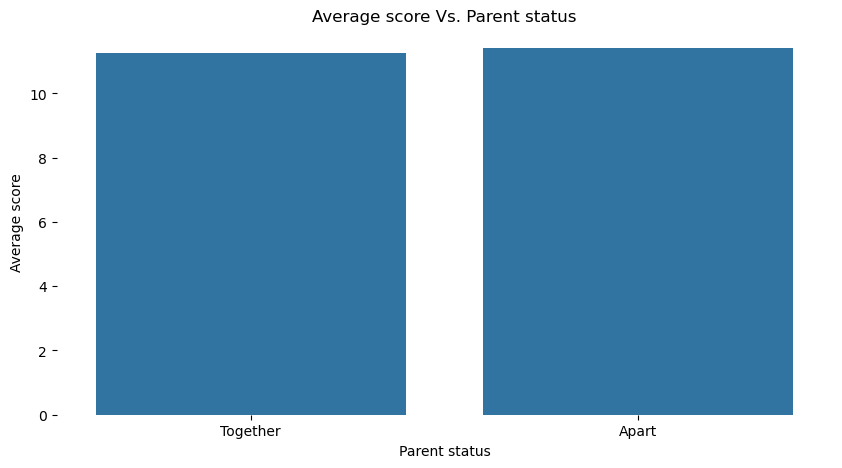

In [13]:
# How the status of parents affect student performance 
plt.figure(figsize=(10,5)) 
parent_status_label = {
    'A':'Apart',
    'T': 'Together'
}

df_student['Pstatus'] = df_student['Pstatus'].map(parent_status_label)
base_color=sns.color_palette()[0]
sns.barplot(x='Pstatus', y='average_score', data=df_student,
             color=base_color, ci=None).set(title='Average score Vs. Parent status');
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.ylabel('Average score')
plt.xlabel('Parent status')
plt.show()

### The status of parent togertherness does not have any sinificant impact on the student performance.

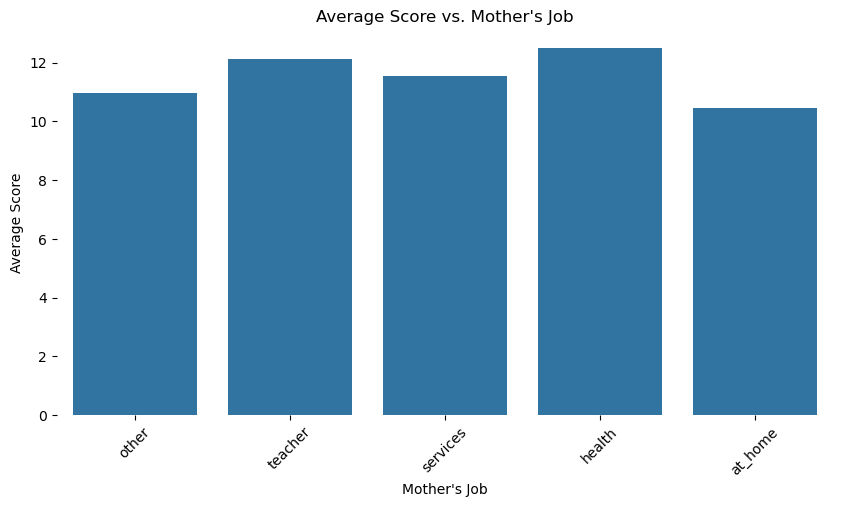

In [14]:

# Average score Vs. Mother's job'
plt.figure(figsize=(10, 5))
base_color = sns.color_palette()[0]
sns.barplot(x='Mjob', y='average_score', data=df_student, color=base_color,ci=None)
plt.title('Average Score vs. Mother\'s Job')
plt.xlabel('Mother\'s Job')
plt.ylabel('Average Score')
plt.xticks(rotation=45)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.show()


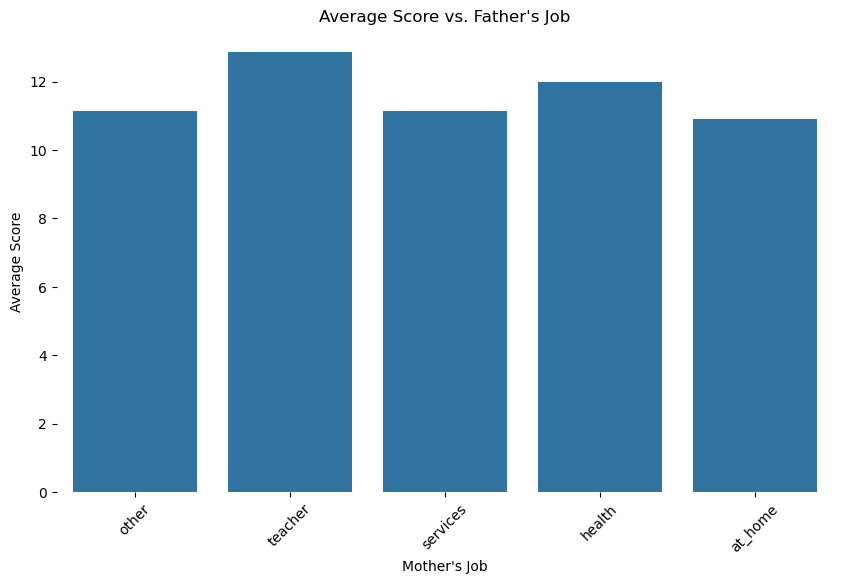

In [15]:
# Average score Vs. Mother's job'
plt.figure(figsize=(10, 6))
base_color = sns.color_palette()[0]
sns.barplot(x='Fjob', y='average_score', data=df_student, color=base_color,ci=None)
plt.title('Average Score vs. Father\'s Job')
plt.xlabel('Mother\'s Job')
plt.ylabel('Average Score')
plt.xticks(rotation=45)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.show()


Students that have their paprents as Teachers and Health workers appears to performed better compared to other jobs.

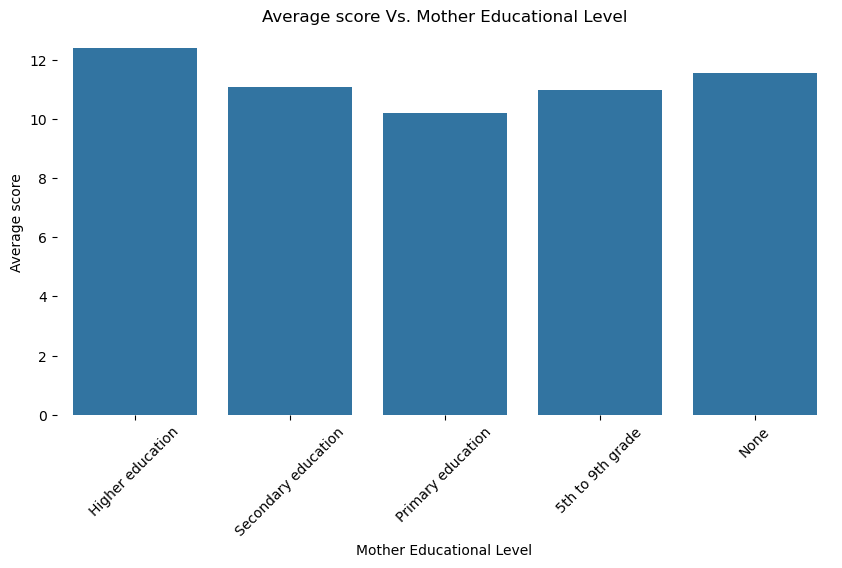

In [16]:
# Average score Vs. Mother educational level
plt.figure(figsize=(10,5)) 
medu_label = {
    0:'None',
    1: 'Primary education',
    2: '5th to 9th grade',
    3: 'Secondary education',
    4: 'Higher education'
}

df_student['Medu'] = df_student['Medu'].map(medu_label)
base_color=sns.color_palette()[0]
sns.barplot(x='Medu', y='average_score', data=df_student,
             color=base_color, ci=None).set(title='Average score Vs. Mother Educational Level');
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.ylabel('Average score')
plt.xlabel('Mother Educational Level')
plt.xticks(rotation=45)
plt.show()

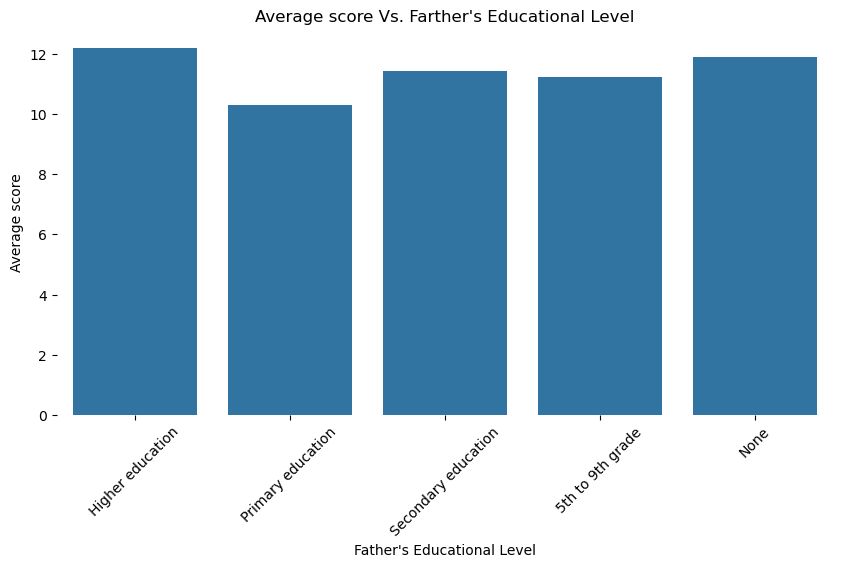

In [17]:
# Average score Vs. Father\'s educational level
plt.figure(figsize=(10,5)) 
fedu_label = {
    0:'None',
    1: 'Primary education',
    2: '5th to 9th grade',
    3: 'Secondary education',
    4: 'Higher education'
}

df_student['Fedu'] = df_student['Fedu'].map(fedu_label)
base_color=sns.color_palette()[0]
sns.barplot(x='Fedu', y='average_score', data=df_student,
             color=base_color, ci=None).set(title='Average score Vs. Farther\'s Educational Level');
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.ylabel('Average score')
plt.xlabel('Father\'s Educational Level')
plt.xticks(rotation=45)
plt.show()


#### Students that have their parent with higher education appears to perfromed batter.

In [18]:
df_student.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,goout,Dalc,Walc,health,absences,G1,G2,G3,Subject,average_score
374,MS,F,18,R,LE3,Together,Higher education,Higher education,other,other,...,4,1,1,1,0,19,18,19,1,19.0
110,GP,M,15,U,LE3,Apart,Higher education,Higher education,teacher,teacher,...,3,1,1,4,6,18,19,19,1,19.0
733,GP,F,17,R,LE3,Together,Secondary education,Primary education,services,other,...,2,1,1,3,0,18,19,19,0,19.0
47,GP,M,16,U,GT3,Together,Higher education,Secondary education,health,services,...,2,1,1,2,4,19,19,20,1,19.0
113,GP,M,15,U,LE3,Together,Higher education,5th to 9th grade,teacher,other,...,2,1,1,3,10,18,19,19,1,19.0


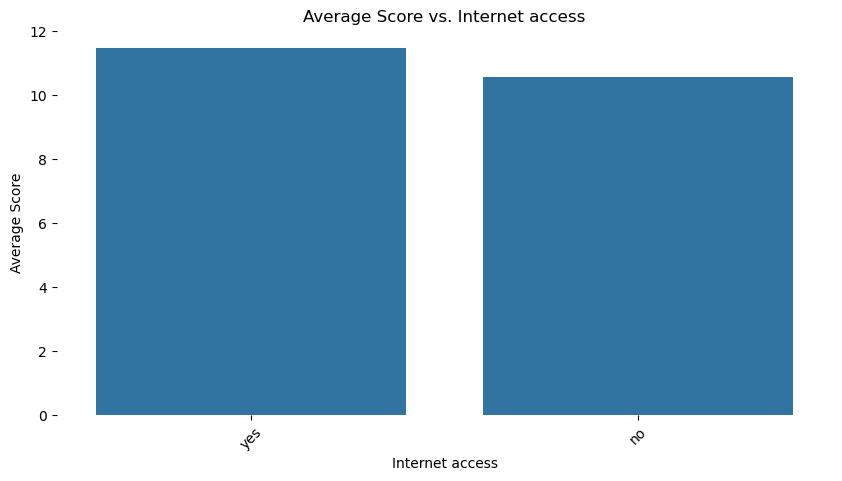

In [19]:

# Average score Vs. Internet access'
plt.figure(figsize=(10, 5))
base_color = sns.color_palette()[0]
sns.barplot(x='internet', y='average_score', data=df_student, color=base_color,ci=None)
plt.title('Average Score vs. Internet access')
plt.xlabel('Internet access')
plt.ylabel('Average Score')
plt.xticks(rotation=45)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.show()

#### Student with internet access recorded a better performance compared to their follow students.

In [20]:
df_student['guardian'].value_counts()

mother    728
father    243
other      73
Name: guardian, dtype: int64

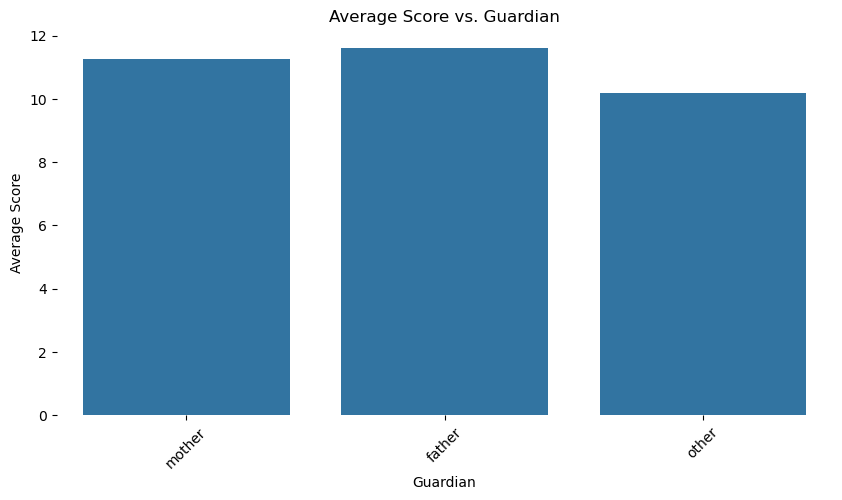

In [21]:

# Average score Vs. guardian access' 
plt.figure(figsize=(10, 5))
base_color = sns.color_palette()[0]
sns.barplot(x='guardian', y='average_score', data=df_student, color=base_color,ci=None)
plt.title('Average Score vs. Guardian')
plt.xlabel('Guardian')
plt.ylabel('Average Score')
plt.xticks(rotation=45)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.show()

#### Even when the majority of the students have their Guardian to be `Mother`, those with `Father` still perfored better.

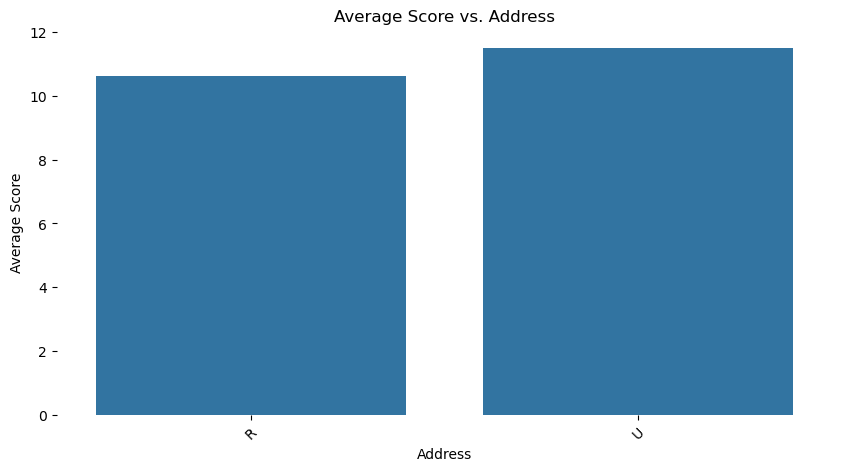

In [22]:
# Average score Vs. address access' 
plt.figure(figsize=(10, 5))
base_color = sns.color_palette()[0]
sns.barplot(x='address', y='average_score', data=df_student, color=base_color,ci=None)
plt.title('Average Score vs. Address')
plt.xlabel('Address')
plt.ylabel('Average Score')
plt.xticks(rotation=45)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.show()

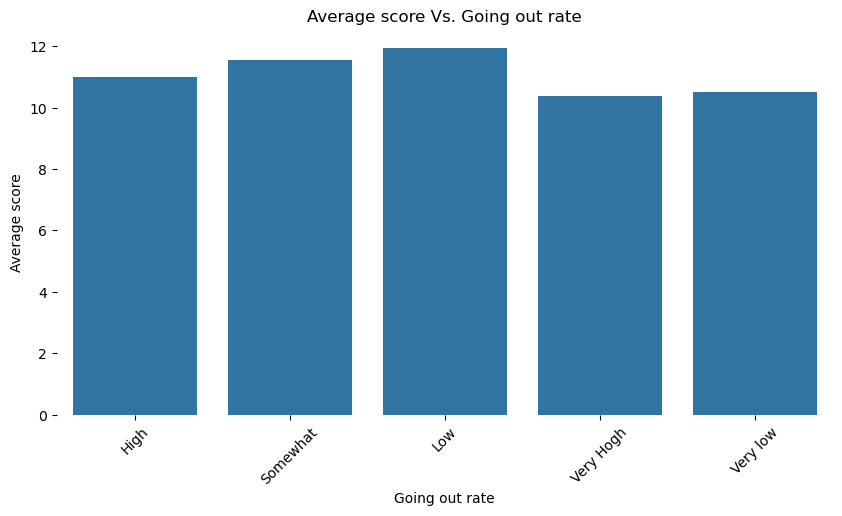

In [23]:

# Average score Vs. Going out rate'
plt.figure(figsize=(10,5)) 
goout_label = {
 
    1: 'Very low',
    2: 'Low',
    3: 'Somewhat',
    4: 'High',
    5: 'Very Hogh'
}

df_student['goout'] = df_student['goout'].map(goout_label)
base_color=sns.color_palette()[0]
sns.barplot(x='goout', y='average_score', data=df_student,
             color=base_color, ci=None).set(title='Average score Vs. Going out rate');
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.ylabel('Average score')
plt.xlabel('Going out rate')
plt.xticks(rotation=45)
plt.show()


Text(0.5, 0, 'G2')

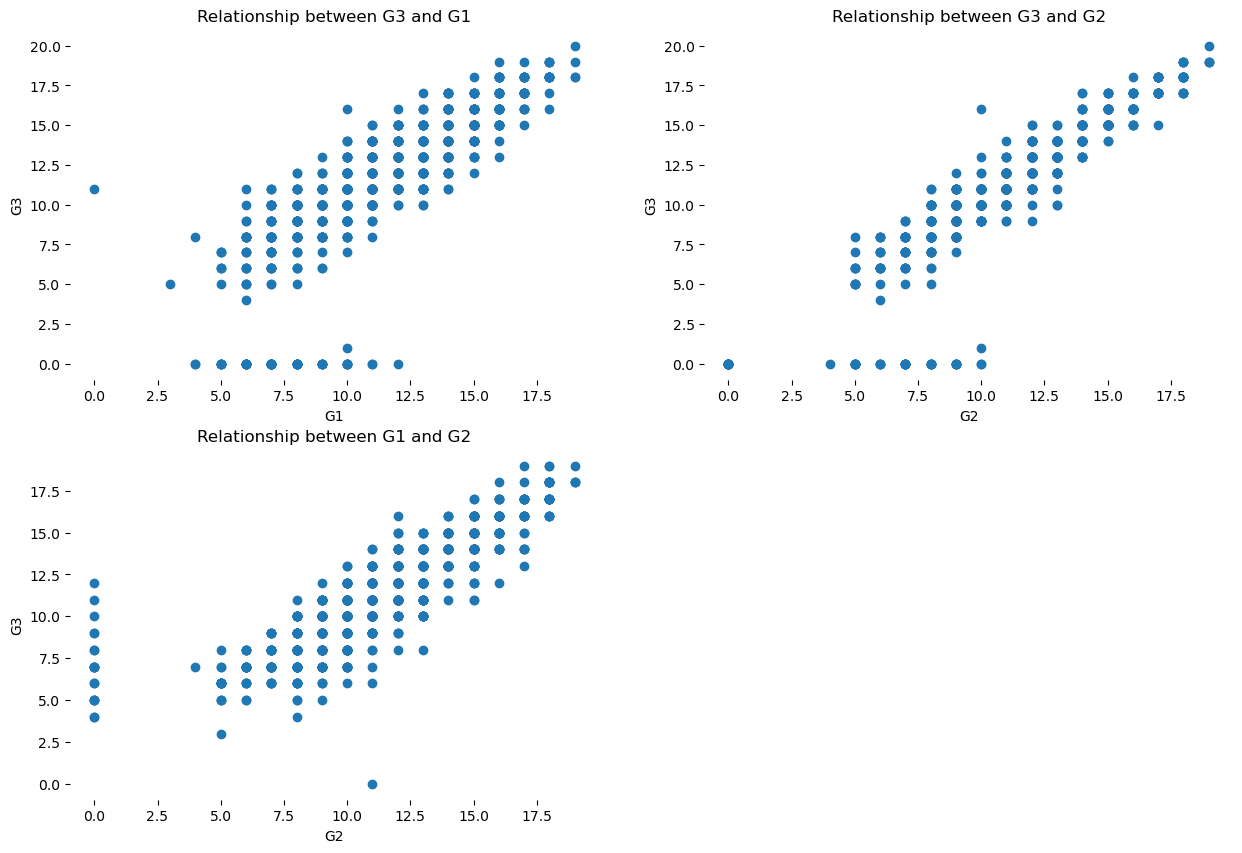

In [24]:
plt.figure(figsize = [15, 10])
plt.subplot(2,2,1)
plt.scatter(data = df_student, x = 'G1', y = 'G3')
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.title('Relationship between G3 and G1')
plt.ylabel('G3')
plt.xlabel('G1')

plt.subplot(2,2,2)
plt.scatter(data = df_student, x = 'G2', y = 'G3')
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.title('Relationship between G3 and G2')
plt.ylabel('G3')
plt.xlabel('G2')

plt.subplot(2,2,3)
plt.scatter(data = df_student, x = 'G2', y = 'G1')
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.title('Relationship between G1 and G2')
plt.ylabel('G3')
plt.xlabel('G2')

In [25]:
df_student.corr()

,age,traveltime,studytime,failures,famrel,freetime,Dalc,Walc,health,absences,G1,G2,G3,Subject,average_score
age,1.000000,0.049216,-0.007870,0.282364,0.007162,0.002645,0.133453,0.098291,-0.029129,0.153196,-0.124121,-0.119475,-0.125282,-0.018790,-0.127104
traveltime,0.049216,1.000000,-0.081328,0.087177,-0.012578,-0.007403,0.109423,0.084292,-0.029002,-0.022669,-0.121053,-0.140163,-0.102627,-0.079881,-0.119439
studytime,-0.007870,-0.081328,1.000000,-0.152024,0.012324,-0.094429,-0.159665,-0.229073,-0.063044,-0.075594,0.211314,0.183167,0.161629,0.060934,0.189784
failures,0.282364,0.087177,-0.152024,1.000000,-0.053676,0.102679,0.116336,0.107432,0.048311,0.099998,-0.374175,-0.377172,-0.383145,0.083043,-0.390212
famrel,0.007162,-0.012578,0.012324,-0.053676,1.000000,0.136901,-0.076483,-0.100663,0.104101,-0.062171,0.036947,0.042054,0.054461,0.007091,0.045621
freetime,0.002645,-0.007403,-0.094429,0.102679,0.136901,1.000000,0.144979,0.130377,0.081517,-0.032079,-0.051985,-0.068952,-0.064890,0.025949,-0.062740
Dalc,0.133453,0.109423,-0.159665,0.116336,-0.076483,0.144979,1.000000,0.627814,0.065515,0.132867,-0.150943,-0.131576,-0.129642,-0.011335,-0.139786
Walc,0.098291,0.084292,-0.229073,0.107432,-0.100663,0.130377,0.627814,1.000000,0.106669,0.139703,-0.142401,-0.128114,-0.115740,0.004043,-0.131306
health,-0.029129,-0.029002,-0.063044,0.048311,0.104101,0.081517,0.065515,0.106669,1.000000,-0.027479,-0.060478,-0.088001,-0.080079,0.006205,-0.080805
absences,0.153196,-0.022669,-0.075594,0.099998,-0.062171,-0.032079,0.132867,0.139703,-0.027479,1.000000,-0.092425,-0.089332,-0.045671,0.160125,-0.079030


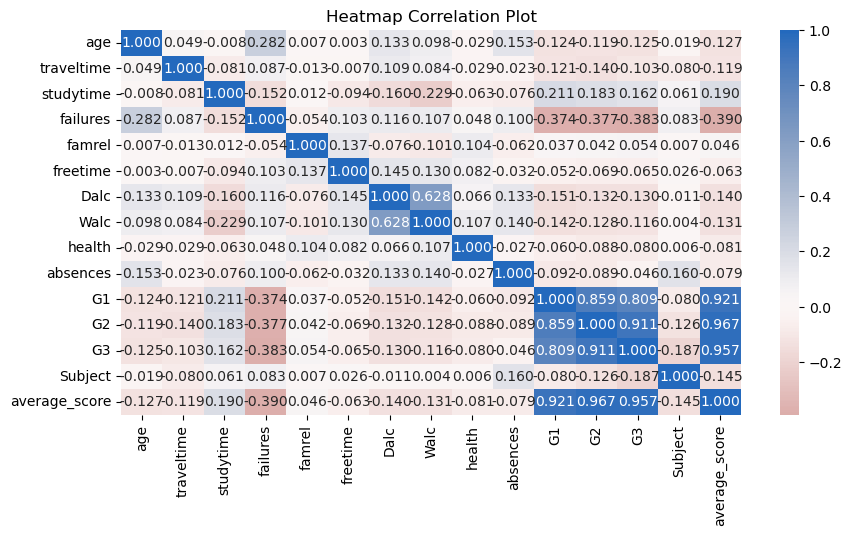

In [26]:
# Visualize the correlation among the varibles.


plt.figure(figsize=[10,5])
sns.heatmap(df_student.corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.title('Heatmap Correlation Plot') 
plt.show()

## KEY INSIGHTS
After an in-depth analysis, the following insights were revealed by the data.
> - Students that have their parents as Teachers and Health workers appear to perform better.
> - Students with Internet access recorded a better grade compared to students without Internet access.
> - Students whose parents have Higher Education qualifications performed better than their fellow counterparts.
> - The status of students' parent togetherness does not have a significant impact on their academic performance.
> - A student who performs well in one period has the potential to do well in other periods.
> - Even when the majority of the students have their Guardians be mothers, those whose guardians are their Fathers still performed better.
> - Students who do not go out recorded the highest performance compared to those who usually go out regularly.
> - Surprisingly, students who leaves in Rural areas performed better than students who leave in urban areas.
